# Goibibo Flights Data Analysis (2023)


1.  * Best Time to Fly (*Price vs. Time Analysis*)*
**Objective**: Identify the best time to book flights for the lowest prices by analyzing historical data.


*   grouping data by different time periods to see how prices vary. Common time groupings are by month, day of the week, or time of day.


*   Analyzing the impact of departure or arrival times on prices can help you determine whether flights at certain times of the day are generally cheaper or more expensive.



2.   *Airline Comparison and Performance Analysis*

**Objective**: Compare different airlines based on pricing, flight duration, and number of stops to determine which airline offers the best value.











In [ ]:
# Importind Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [ ]:
data = pd.read_csv('goibibo_flights.csv')
data

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,2:10:00,6013,non-stop
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,6:20,Mumbai,8:40,2:20:00,6013,non-stop
2,26-06-2023,AirAsia,I5-764,economy,Delhi,4:25,Mumbai,6:35,2:10:00,6016,non-stop
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,2:15:00,6015,non-stop
4,26-06-2023,Vistara,UK-963,economy,Delhi,8:50,Mumbai,11:10,2:20:00,6015,non-stop
...,...,...,...,...,...,...,...,...,...,...,...
300256,13-08-2023,Vistara,UK-822,business,Chennai,9:45,Hyderabad,19:50,10:05:00,70304,1-stop
300257,13-08-2023,Vistara,UK-826,business,Chennai,12:30,Hyderabad,22:55,10:25:00,78262,1-stop
300258,13-08-2023,Vistara,UK-832,business,Chennai,7:05,Hyderabad,20:55,13:50:00,80285,1-stop
300259,13-08-2023,Vistara,UK-828,business,Chennai,7:00,Hyderabad,17:00,10:00:00,82809,1-stop


Checking for NULL values

In [ ]:
data.isnull().sum()

,0
flight date,0
airline,0
flight_num,0
class,0
from,0
dep_time,0
to,0
arr_time,0
duration,0
price,0


Checking for Duplicate rows

In [ ]:
data.duplicated().sum()

8

In [ ]:
duplicated_rows = data[data.duplicated()]
duplicated_rows

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
563,29-06-2023,Air India,AI-807,economy,Delhi,17:20,Mumbai,8:35,15:15:00,12272,1-stop
6181,26-07-2023,Air India,AI-475,economy,Delhi,13:00,Mumbai,13:35,24:35:00,4828,1-stop
10079,26-06-2023,Indigo,0.00E+00,economy,Delhi,14:40,Bangalore,23:30,8:50:00,19695,1-stop
180209,09-08-2023,Indigo,0.00E+00,economy,Hyderabad,7:00,Chennai,13:55,6:55:00,1558,1-stop
180293,10-08-2023,Indigo,0.00E+00,economy,Hyderabad,7:00,Chennai,13:55,6:55:00,1558,1-stop
180376,11-08-2023,Indigo,0.00E+00,economy,Hyderabad,7:00,Chennai,13:55,6:55:00,1558,1-stop
180457,12-08-2023,Indigo,0.00E+00,economy,Hyderabad,7:00,Chennai,13:55,6:55:00,1558,1-stop
180536,13-08-2023,Indigo,0.00E+00,economy,Hyderabad,7:00,Chennai,13:55,6:55:00,1558,1-stop


Ignoring the Duplicate rows as they are unique according to the date

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   flight date  300261 non-null  object
 1   airline      300261 non-null  object
 2   flight_num   300261 non-null  object
 3   class        300261 non-null  object
 4   from         300261 non-null  object
 5   dep_time     300261 non-null  object
 6   to           300261 non-null  object
 7   arr_time     300261 non-null  object
 8   duration     300261 non-null  object
 9   price        300261 non-null  int64 
 10  stops        300261 non-null  object
dtypes: int64(1), object(10)
memory usage: 25.2+ MB


In [ ]:
data.describe()

,price
count,300261.000000
mean,21174.363371
std,23048.497726
min,1116.000000
25%,4831.000000
50%,7499.000000
75%,43159.000000
max,124917.000000


Converting Date Columns to Appropriate **Format**

In [ ]:
# Converting flight_date column to datetime format
data['flight date'] = pd.to_datetime(data['flight date'])

# Extracting day, month, year for further analysis
data['year'] = data['flight date'].dt.year
data['month'] = data['flight date'].dt.month
data['day_of_week'] = data['flight date'].dt.dayofweek  # Monday = 0, Sunday = 6


<ipython-input-26-8bb245f2a7c6>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['flight date'] = pd.to_datetime(data['flight date'])


Data Analysis

<Axes: xlabel='price'>

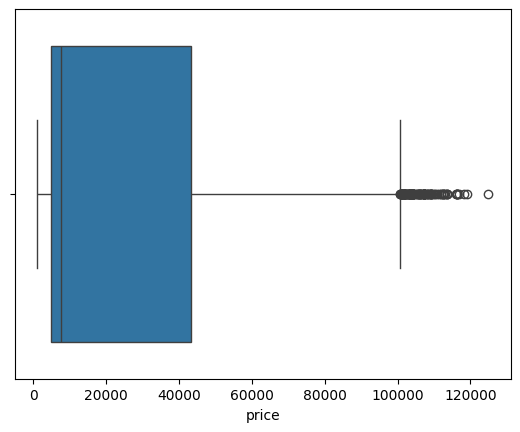

In [ ]:
# Identifying Outliers
sns.boxplot(data=data, x='price')

<Axes: xlabel='price'>

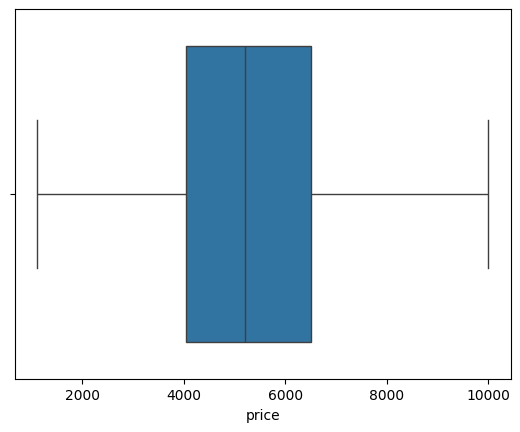

In [ ]:
df = data[data['price'] < 10000]
sns.boxplot(data=df, x='price')

Text(0, 0.5, 'Frequency')

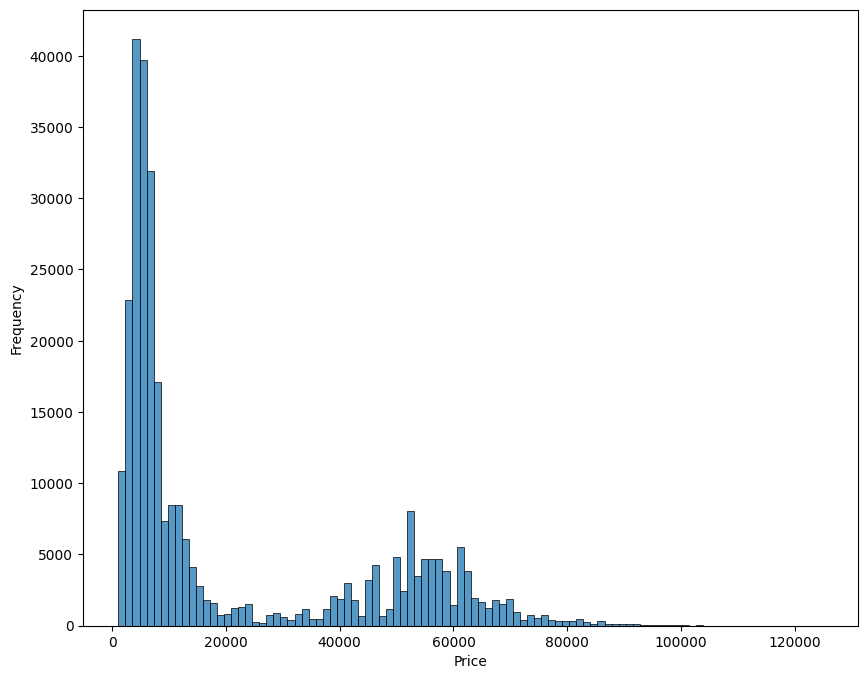

In [ ]:
# Price Distribution
plt.figure(figsize=(10, 8))
sns.histplot(data=data, x='price', bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

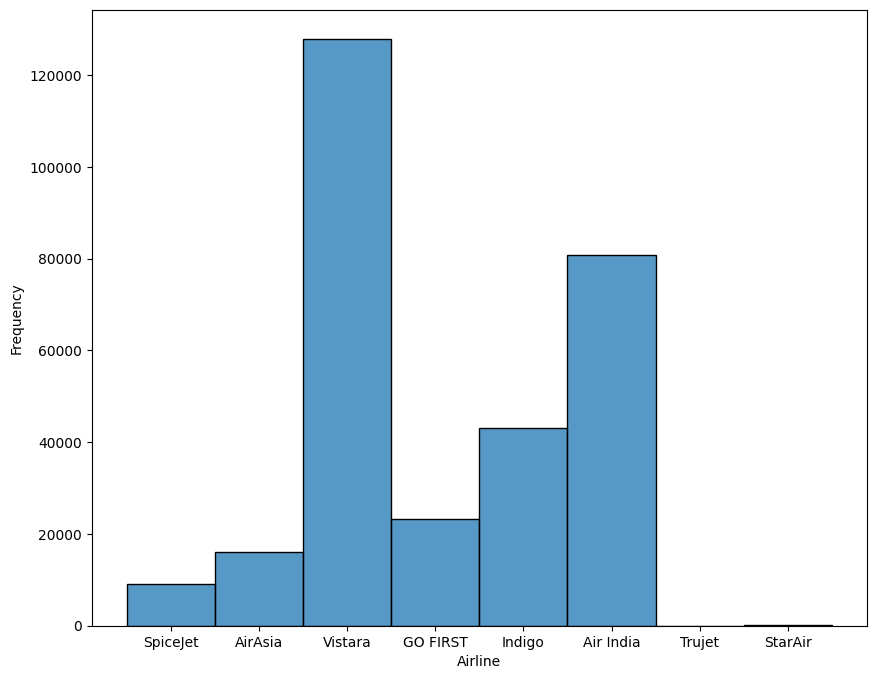

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=data, x='airline')
plt.xlabel('Airline')
plt.ylabel('Frequency')

<Axes: xlabel='airline', ylabel='price'>

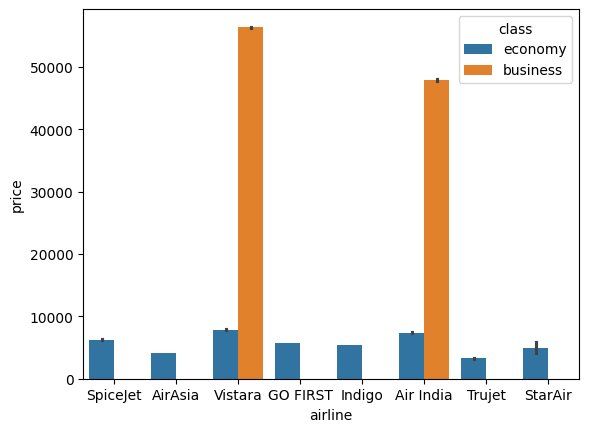

In [ ]:
sns.barplot(data=data, x='airline', y='price', hue='class')

# Performing Time Series Analysis
grouping data by different time periods to see how prices vary. Common time groupings are by month, day of the week, or time of day.

In [ ]:
# Grouping data by month and calculateing the average price
monthly_price = data.groupby('month')['price'].mean().reset_index()

# Grouping data by day of the week and calculating the average price
weekly_price = data.groupby('day_of_week')['price'].mean().reset_index()


Visualising Price Trends by Month

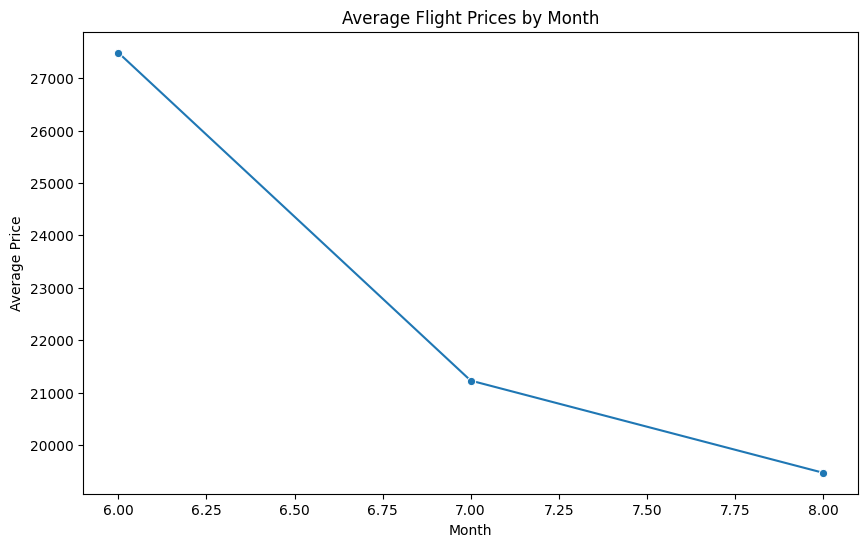

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_price, x='month', y='price', marker='o')
plt.title('Average Flight Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

Visualising Price Trends by Day of the Week

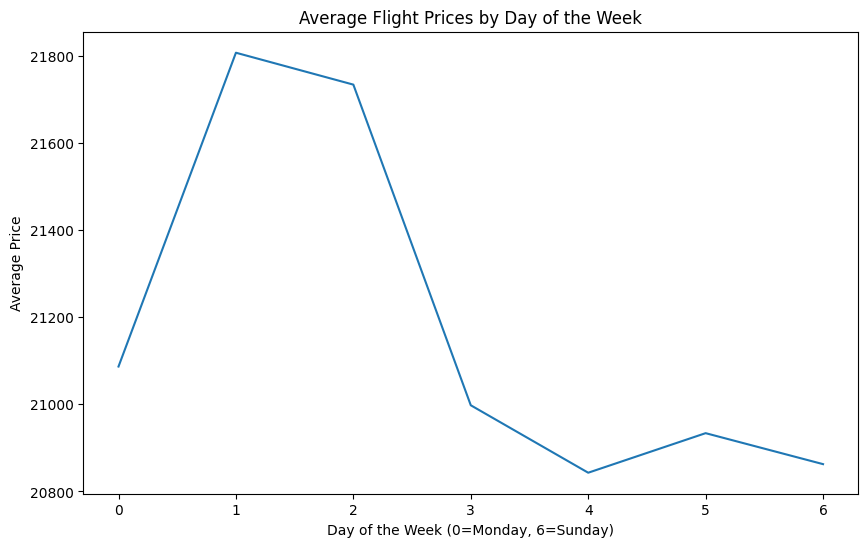

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='day_of_week', y='price', data=weekly_price)
plt.title('Average Flight Prices by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Price')
plt.show()


Analyzing the impact of departure or arrival times on prices can help you determine whether flights at certain times of the day are generally cheaper or more expensive.

In [ ]:
df['dep_time'] = pd.to_datetime(df['dep_time'], format='%H:%M')
df['arr_time'] = pd.to_datetime(df['arr_time'], format='%H:%M')

df['dep_hour'] = df['dep_time'].dt.hour
df['arr_hour'] = df['arr_time'].dt.hour

<ipython-input-69-a4913e5cf030>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dep_time'] = pd.to_datetime(df['dep_time'], format='%H:%M')
<ipython-input-69-a4913e5cf030>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arr_time'] = pd.to_datetime(df['arr_time'], format='%H:%M')
<ipython-input-69-a4913e5cf030>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Grouping Data by Departure and Arrival Time

In [ ]:
avg_price_by_dep_hour = df.groupby('dep_hour')['price'].mean().sort_index()
avg_price_by_arr_hour = df.groupby('arr_hour')['price'].mean().sort_index()

Visualizing the results

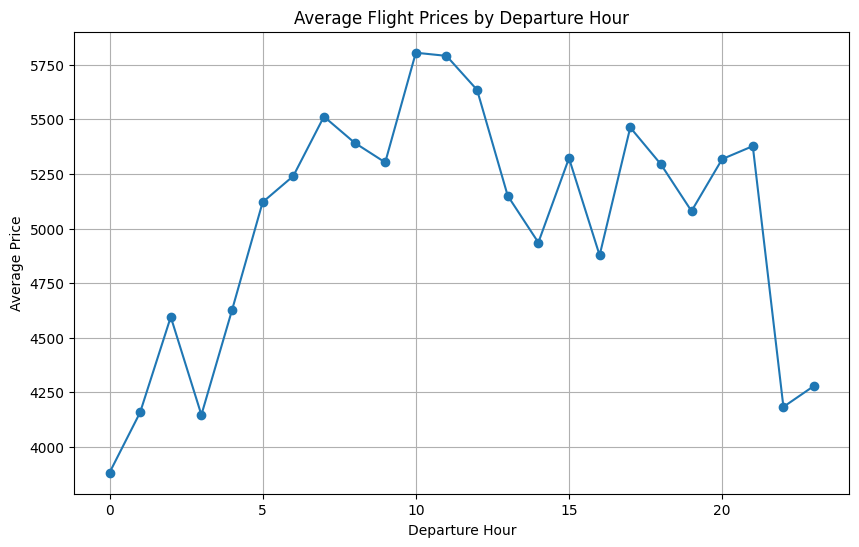

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(avg_price_by_dep_hour.index, avg_price_by_dep_hour.values, marker='o', linestyle='-')
plt.title('Average Flight Prices by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


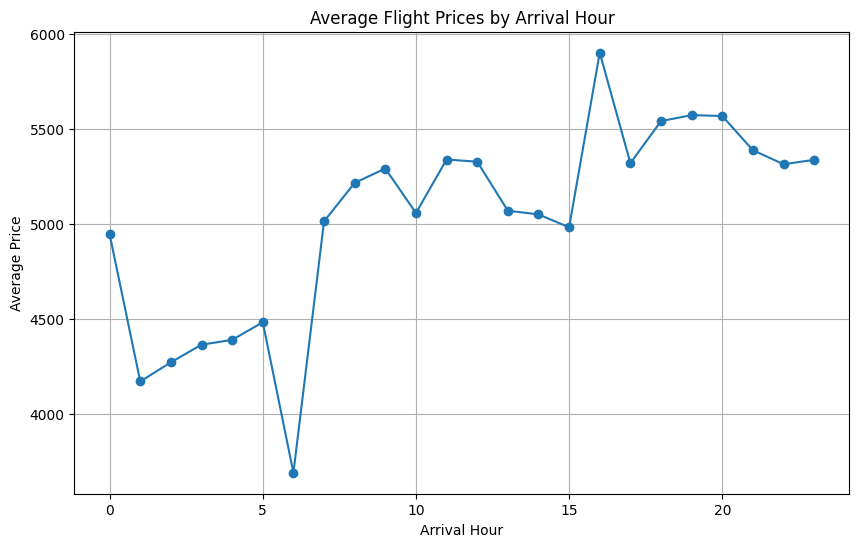

In [ ]:
# Plotting average price by arrival hour
plt.figure(figsize=(10,6))
plt.plot(avg_price_by_arr_hour.index, avg_price_by_arr_hour.values, marker='o', linestyle='-')
plt.title('Average Flight Prices by Arrival Hour')
plt.xlabel('Arrival Hour')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


# Airline Comparison and Performance Analysis

In [ ]:
# Function to convert duration to minutes
def duration_to_minutes(duration):
    try:
        hours, minutes = map(int, duration.split(':'))
        return hours * 60 + minutes
    except ValueError:
        # Handle cases with more than one colon (e.g., 'HH:MM:SS')
        parts = duration.split(':')
        if len(parts) == 3:  # Assuming format 'HH:MM:SS'
            hours, minutes, seconds = map(int, parts)
            return hours * 60 + minutes + seconds // 60  # Convert seconds to minutes
        else:
            # Handle other unexpected formats or log an error
            print(f"Unexpected duration format: {duration}")
            return None  # or raise an exception

# Apply to the duration column
df['duration_minutes'] = df['duration'].apply(duration_to_minutes)

Unexpected duration format: 1.03: 
Unexpected duration format: 1.02: 
Unexpected duration format: 1.03: 
Unexpected duration format: 1.01: 


<ipython-input-78-a78338bfdbc8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_minutes'] = df['duration'].apply(duration_to_minutes)


In [ ]:
df['duration_minutes']

,duration_minutes
0,130.0
1,140.0
2,130.0
3,135.0
4,140.0
...,...
206769,830.0
206770,830.0
206771,1235.0
206772,1400.0


Grouping Data by Airline

In [ ]:
# Calculating average price and duration for each airline
airline_comparison = df.groupby('airline').agg(
    avg_price=('price', 'mean'),
    avg_duration=('duration_minutes', 'mean')
).reset_index()

print(airline_comparison)

     airline    avg_price  avg_duration
0  Air India  5659.191903    935.977655
1    AirAsia  3710.035269    533.449067
2   GO FIRST  5247.059278    522.038291
3     Indigo  4574.925885    339.803671
4   SpiceJet  5537.213117    738.501030
5    StarAir  4656.779661    140.593220
6     Trujet  3277.097561    232.073171
7    Vistara  6016.102739    779.613534


Determining the Best Value Airline

> Add blockquote



In [ ]:
# Adding a new column for total score
airline_comparison['total_score'] = airline_comparison[['avg_price', 'avg_duration']].mean(axis=1)

airline_comparison = airline_comparison.sort_values('total_score')

print(airline_comparison[['airline', 'total_score']])


     airline  total_score
6     Trujet  1754.585366
1    AirAsia  2121.742168
5    StarAir  2398.686441
3     Indigo  2457.364778
2   GO FIRST  2884.548785
4   SpiceJet  3137.857074
0  Air India  3297.584779
7    Vistara  3397.858137


Visualizing the Results

<Figure size 1000x600 with 0 Axes>

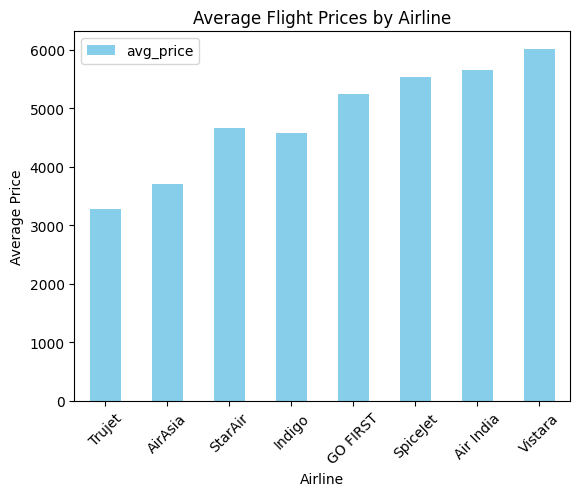

In [ ]:
# Plot average price by airline
plt.figure(figsize=(10,6))
airline_comparison.plot(kind='bar', x='airline', y='avg_price', color='skyblue')
plt.title('Average Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

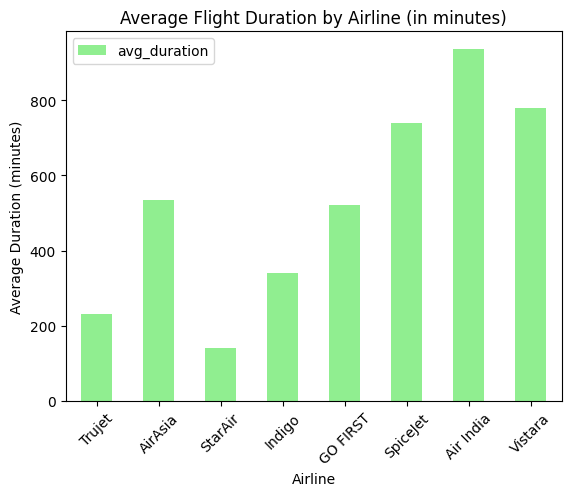

In [ ]:
# Plot average duration by airline
plt.figure(figsize=(10,6))
airline_comparison.plot(kind='bar', x='airline', y='avg_duration', color='lightgreen')
plt.title('Average Flight Duration by Airline (in minutes)')
plt.xlabel('Airline')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.show()
